In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Index

1. Exploratory Data Analysis

- 1.1 Data intepretation (I)

- 1.2 Data intepretation (II)

- 1.3 Data processing

> 1.3.1 Missing values amount

> 1.3.2 Missing values distribution

> 1.3.3 Handling missing values in categorical features

> 1.3.3.1 Labelling missing values

> 1.3.4 Handling missing values in numerical features

> 1.3.4.1 Median imputation

> 1.3.5 Dataset before (df) and after (df2) modifications comparation - Numerical features

> 1.3.6 Handling missing values in numerical features (II)

> 1.3.6.1 Iterative imputation

> 1.3.7 Dataset before (df) and after (df3) modifications comparation - Numerical features (II)

- 1.4 Data  Overview - Visual analysis

> 1.4.1 Do overtime stresses employees and makes them have to leave?

> 1.4.2 Is salary one of the main reasons?

> 1.4.3 What is the effect of age on attrition?

2. Statistics Analysis

- 2.1 Statistics Analysis (I)

> 2.1.1 Correlation Overview

> 2.1.2 Correlation - JobSatisfaction

> 2.1.3 Correlation - Performance Rating

> 2.1.4 Correlation - Attrition Yes

> 2.1.5 Correlation - Environment Satisfaction

> 2.1.6 Correlation - Distance From Home

> 2.1.7 Correlation - Years In Current Role

> 2.1.8 Correlation - Years With Current Manager

> 2.1.9 Correlation - BusinessTravel - Non Travel

> 2.1.10 Correlation - Years At Company

> 2.1.11 Correlation - Stock Option Level

> 2.1.12 Correlation - Training Times Last Year

> 2.1.13 Correlation - Department

> 2.1.13.1 Correlation - Department - Sales

> 2.1.13.2 Correlation - Department - Research & Development

> 2.1.13.3 Correlation - Department - Human Resources

> 2.1.14 Correlation - JobRole

> 2.1.14.1 Correlation - JobRole - Research Director

> 2.1.14.2 Correlation - JobRole - Manufacturing Director

> 2.1.14.3 Correlation - JobRole - Sales Executive

- 2.2 Statistics Analysis (II)

> 2.2.1 T-test

> 2.2.1.1 T-test | Age - Attrition

> 2.2.1.2 T-test | DistanceFromHome - Attrition 

> 2.2.1.3 T-test | Standard Hours - Attrition

> 2.2.1.4 T-test | Stock Option Level - Attrition

> 2.2.1.5 T-test | Training time last year - Attrition

> 2.2.2 Chi-squared

> 2.2.2.1 Chi-squared | DistanceFromHome_Class - JobSatisfaction_Class

3. Statistics Analysis



## 1. Exploratory Data Analysis

- 1.1 Data intepretation (I)

How many categorical and numerical columns we have?

In [2]:
df=pd.read_csv("Employee_Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

- Conclusion

As we can see:
    We have 1470 entries in total and 147 with missing values (1470-1323).
    We have 9 categorical columns and 26 numerical ones. Our datatypes are float and objects.

Columns to perform the study based on are "JobSatisfaction" and "PerformanceRating"

Entries with null values

In [3]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [4]:
missing_percentage = df.isnull().mean() * 100

missing_percentage

Age                         10.0
Attrition                   10.0
BusinessTravel              10.0
DailyRate                   10.0
Department                  10.0
DistanceFromHome            10.0
Education                   10.0
EducationField              10.0
EmployeeCount               10.0
EmployeeNumber              10.0
EnvironmentSatisfaction     10.0
Gender                      10.0
HourlyRate                  10.0
JobInvolvement              10.0
JobLevel                    10.0
JobRole                     10.0
JobSatisfaction             10.0
MaritalStatus               10.0
MonthlyIncome               10.0
MonthlyRate                 10.0
NumCompaniesWorked          10.0
Over18                      10.0
OverTime                    10.0
PercentSalaryHike           10.0
PerformanceRating           10.0
RelationshipSatisfaction    10.0
StandardHours               10.0
StockOptionLevel            10.0
TotalWorkingYears           10.0
TrainingTimesLastYear       10.0
WorkLifeBa

- Conclusion

It is evident that each column has at least 147 missing values, which accounts for 10% of the data.

In [5]:
df.isnull().sum().sum()

5145

- Conclusion

Null values will not be deleted as they are scattered throughout the dataset.

- 1.2 Data intepretation (II)

In [6]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323,1323,1323.000000,1323,1323.000000,1323.000000,1323,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1065,890,NaN,824,NaN,NaN,504,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.635268,NaN,NaN,802.030050,NaN,9.091097,2.923447,NaN,0.999325,1026.679166,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,NaN,NaN,414.031025,NaN,8.177870,1.072203,NaN,0.099656,610.480802,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,NaN,NaN,86.828045,NaN,0.750112,0.770362,NaN,0.628985,1.054148,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,NaN,NaN,456.479553,NaN,2.147069,2.122706,NaN,0.931146,501.854842,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,NaN,NaN,782.958705,NaN,6.920808,3.015658,NaN,0.998949,1022.025017,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,NaN,NaN,1130.577949,NaN,13.584900,3.700560,NaN,1.067371,1533.811096,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964


In [7]:
df.nunique()

Age                         1323
Attrition                      2
BusinessTravel                 3
DailyRate                   1323
Department                     3
DistanceFromHome            1323
Education                   1323
EducationField                 6
EmployeeCount               1323
EmployeeNumber              1323
EnvironmentSatisfaction     1323
Gender                         2
HourlyRate                  1323
JobInvolvement              1323
JobLevel                    1323
JobRole                        9
JobSatisfaction             1323
MaritalStatus                  3
MonthlyIncome               1323
MonthlyRate                 1323
NumCompaniesWorked          1146
Over18                         1
OverTime                       2
PercentSalaryHike           1323
PerformanceRating           1323
RelationshipSatisfaction    1323
StandardHours               1323
StockOptionLevel             772
TotalWorkingYears           1314
TrainingTimesLastYear       1275
WorkLifeBa

In [8]:
df['Over18'].value_counts()

Y    1323
Name: Over18, dtype: int64

- Conclusion

The term 'Over18' has been removed as it is redundant with the data we have regarding the employees' age, avoiding duplication of information.

Additionally, the categories of 'Gender', 'Marital Status', 'WorkLifeBalance' have been removed from the data due to their potential to be considered sexist or an invasion of employee privacy.

In [9]:
df.drop(['Over18','Gender','MaritalStatus','WorkLifeBalance'], axis=1, inplace=True)

Statisitical description of numerical columns?

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,3.149344,2.720431,80.241313,0.814757,11.426152,2.811756,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,0.476027,1.115959,8.022535,0.863076,8.075870,1.329044,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,2.845502,1.909010,74.882946,0.000000,5.953221,1.967328,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.335525,3.639961,85.664169,1.082523,15.324548,3.366949,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,36.848408,19.091844,17.273662,19.976003


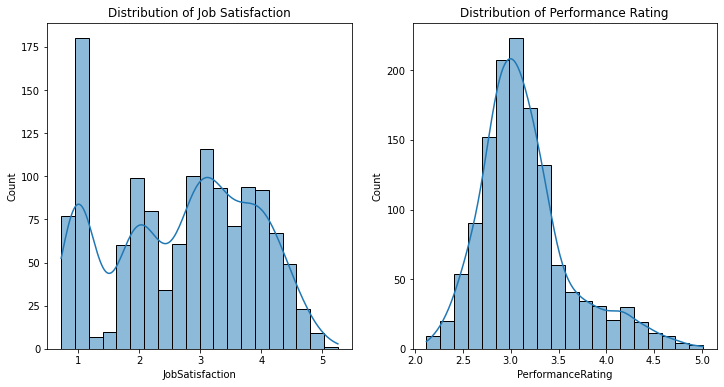

In [11]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

- Conclusion

- The mean age is approximately 35.7 years with a standard deviation of 7.7 years, indicating a moderately diverse age range.

- The average daily rate is approximately £801.45, with a wide range (standard deviation: £428.64).

- On average, employees live 8.06 km away from work, with considerable variation in this distance (standard deviation: 8.49 km).

- The average education level is 2.7 on a scale of 1-5, indicating that most employees have at least some college education.

- The average hourly rate is £64.29 with a standard deviation of £19.5.

- The average job level is 1.85, indicating that most employees hold lower to mid-level positions.

-  Employees have an average of 9.7 years of total work experience.

-  The average length of employment at the company is 5.7 years, but this varies significantly (standard deviation: 5.03 years).

-  The range of job satisfaction levels among employees is diverse, with some being very dissatisfied and others very satisfied.

-  Performance ratings demonstrate less variability than job satisfaction, with the majority of employees clustered around the average rating.

- Note

Notice that the performance rating of employees follows a normal distribution where most of the answers are concentrated between a 2.5 and 3.5, indicating that the most common is a regular performance. However, the distribution of Job Satisfaction does not follow a normal distribution but is a wider scattered, indicating that the job satisfaction in the of employees in the company is very different amount each employee.

Statisitical description of categorical columns?

In [12]:
df.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,JobRole,OverTime
count,1323,1323,1323,1323,1323,1323
unique,2,3,3,6,9,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Sales Executive,No
freq,1065,890,824,504,281,929


In [13]:
df['BusinessTravel'].value_counts()

Travel_Rarely        890
Travel_Frequently    279
Non-Travel           154
Name: BusinessTravel, dtype: int64

In [14]:
df['EducationField'].value_counts()

Life Sciences       504
Medical             397
Marketing           149
Technical Degree    141
Other                83
Human Resources      49
Name: EducationField, dtype: int64

In [15]:
df['OverTime'].value_counts()

No     929
Yes    394
Name: OverTime, dtype: int64

In [16]:
df['JobRole'].value_counts()

Sales Executive              281
Research Scientist           257
Laboratory Technician        229
Manufacturing Director       122
Healthcare Representative    118
Manager                      101
Research Director             80
Sales Representative          75
Human Resources               60
Name: JobRole, dtype: int64

In [17]:
df['Attrition'].value_counts()

No     1065
Yes     258
Name: Attrition, dtype: int64

In [18]:
df['Department'].value_counts()

Research & Development    824
Sales                     393
Human Resources           106
Name: Department, dtype: int64

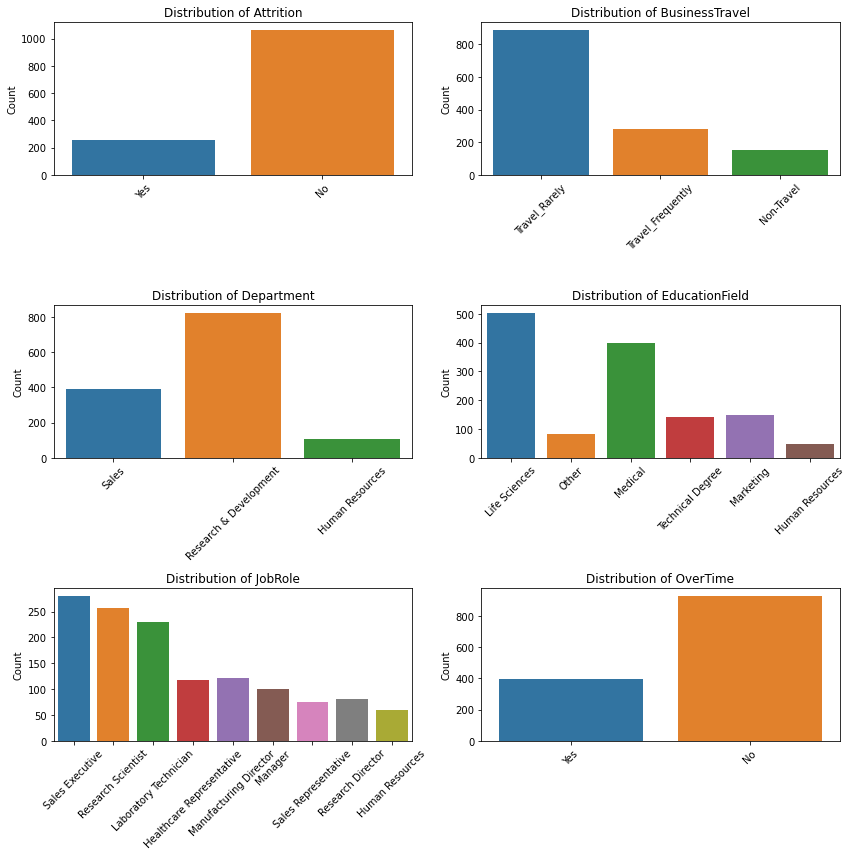

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting the distribution of each categorical variable
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Note

It is important to note that NaN values are not represented when using .value_counts() or plotting data. Therefore, they must be labelled and processed into a numerical form for further analysis.

In [20]:
df_cat_columns = df[categorical_columns].fillna('Missing')

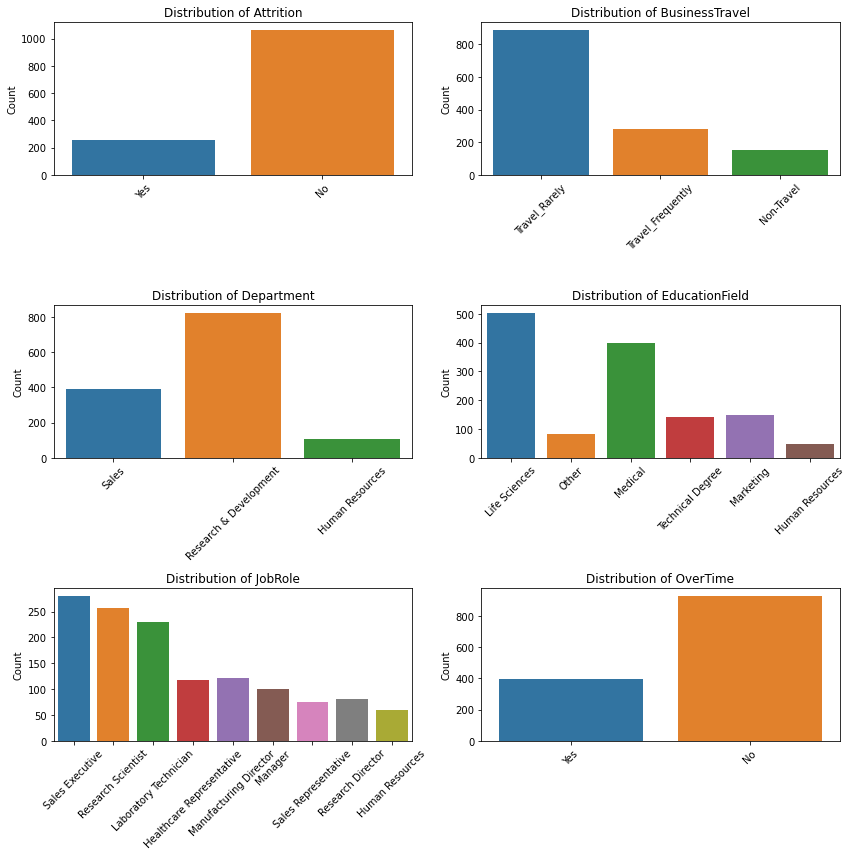

In [21]:
categorical_columns = df_cat_columns.select_dtypes(include=['object']).columns

# Plotting the distribution of each categorical variable
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The profile of the average employee is the next one:

In [22]:
most_common_values = df[categorical_columns].mode().iloc[0]
most_common_values

Attrition                             No
BusinessTravel             Travel_Rarely
Department        Research & Development
EducationField             Life Sciences
JobRole                  Sales Executive
OverTime                              No
Name: 0, dtype: object

- 1.3 Data processing

> 1.3.1 Missing values amount

The initial inquiry is whether our NaN values are in float and np.nan format or in string format as 'nan'.
Pandas only identifies np.nan as null values in numeric arrays, None or NaN in object arrays, and NaT in datatimelike. Any null value in string format is not recognised by pandas as a null value.

In [23]:
for column in df.columns:
    # Checking if there are NaN values in the column
    if df[column].isnull().any():
        # Extract the first non-null value for type comparison
        nan_value = df[column][df[column].isnull()].iloc[0]

        # Check the type of the NaN value
        if isinstance(nan_value, float) and np.isnan(nan_value):
            print(f"Column '{column}': NaN values are of type float (numpy.nan)")
        else:
            print(f"Column '{column}': NaN values are not numpy.nan")

Column 'Age': NaN values are of type float (numpy.nan)
Column 'Attrition': NaN values are of type float (numpy.nan)
Column 'BusinessTravel': NaN values are of type float (numpy.nan)
Column 'DailyRate': NaN values are of type float (numpy.nan)
Column 'Department': NaN values are of type float (numpy.nan)
Column 'DistanceFromHome': NaN values are of type float (numpy.nan)
Column 'Education': NaN values are of type float (numpy.nan)
Column 'EducationField': NaN values are of type float (numpy.nan)
Column 'EmployeeCount': NaN values are of type float (numpy.nan)
Column 'EmployeeNumber': NaN values are of type float (numpy.nan)
Column 'EnvironmentSatisfaction': NaN values are of type float (numpy.nan)
Column 'HourlyRate': NaN values are of type float (numpy.nan)
Column 'JobInvolvement': NaN values are of type float (numpy.nan)
Column 'JobLevel': NaN values are of type float (numpy.nan)
Column 'JobRole': NaN values are of type float (numpy.nan)
Column 'JobSatisfaction': NaN values are of typ

- Note

The dataset contains NaN values, which are identified correctly by the .isnull function as they are of type numpy.nan and float.

> 1.3.2 Missing values distribution

The next question to answer is whether the null values follow a pattern or are randomly distributed.

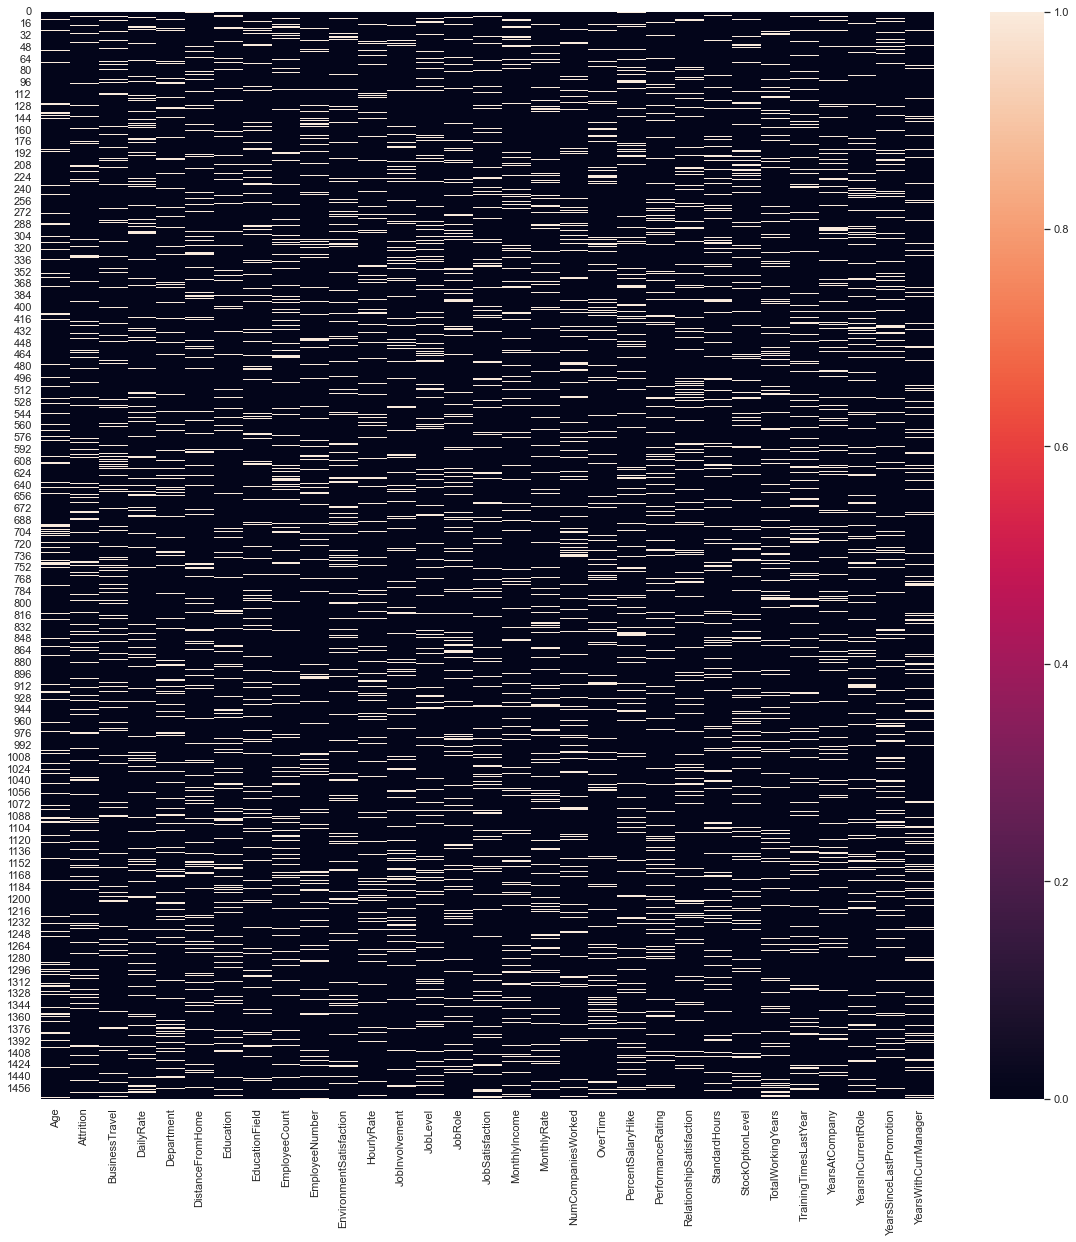

In [24]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(df.isnull())
plt.show(plot)

- Conclusion

As we can see in the previous visualization the null values in our dataset are randomly distributed.

Once we had confirmed the number of null values we had, and whether or not they were randomly distributed, we decided to label the nan values presented in categorical features as a separate category.

> 1.3.3 Handling missing values in categorical features

> 1.3.3.1 Labelling missing values

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
df2 = df[categorical_columns].fillna('Missing')

> 1.3.4 Handling missing values in numerical features

In [26]:
missing_percentage = df.select_dtypes(include=['float64']).isnull().mean() * 100

missing_percentage

Age                         10.0
DailyRate                   10.0
DistanceFromHome            10.0
Education                   10.0
EmployeeCount               10.0
EmployeeNumber              10.0
EnvironmentSatisfaction     10.0
HourlyRate                  10.0
JobInvolvement              10.0
JobLevel                    10.0
JobSatisfaction             10.0
MonthlyIncome               10.0
MonthlyRate                 10.0
NumCompaniesWorked          10.0
PercentSalaryHike           10.0
PerformanceRating           10.0
RelationshipSatisfaction    10.0
StandardHours               10.0
StockOptionLevel            10.0
TotalWorkingYears           10.0
TrainingTimesLastYear       10.0
YearsAtCompany              10.0
YearsInCurrentRole          10.0
YearsSinceLastPromotion     10.0
YearsWithCurrManager        10.0
dtype: float64

- Conclusion

The missingness is random and the amount of missing values is low, so we are deciding to start performing a median imputation using the SimpleImputer class from sklearn.impute:
- In our dataset we don't have to worry about outliers since all the answers are given from a set of questions.
- When deciding how to handle missing values for numerical entries, SimpleImputer was chosen because it applies the same imputation strategy across all columns, ensuring consistency in how missing values are handled and reducing the likelihood of bias. 

> 1.3.4.1 Median imputation

In [27]:
imputer = SimpleImputer(strategy='median')

numerical_columns = df.select_dtypes(include=['float64']).columns

df2[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1470 non-null   object 
 1   BusinessTravel            1470 non-null   object 
 2   Department                1470 non-null   object 
 3   EducationField            1470 non-null   object 
 4   JobRole                   1470 non-null   object 
 5   OverTime                  1470 non-null   object 
 6   Age                       1470 non-null   float64
 7   DailyRate                 1470 non-null   float64
 8   DistanceFromHome          1470 non-null   float64
 9   Education                 1470 non-null   float64
 10  EmployeeCount             1470 non-null   float64
 11  EmployeeNumber            1470 non-null   float64
 12  EnvironmentSatisfaction   1470 non-null   float64
 13  HourlyRate                1470 non-null   float64
 14  JobInvol

> 1.3.5 Dataset before (df) and after (df2) modifications comparation - Numerical features

- Statistical comparison

Dataset before handling null values

In [29]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,3.149344,2.720431,80.241313,0.814757,11.426152,2.811756,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,0.476027,1.115959,8.022535,0.863076,8.075870,1.329044,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,2.845502,1.909010,74.882946,0.000000,5.953221,1.967328,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.335525,3.639961,85.664169,1.082523,15.324548,3.366949,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,36.848408,19.091844,17.273662,19.976003


Dataset after handling null values

In [30]:
df2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.466937,800.122915,8.874068,2.932668,0.999288,1026.213751,2.742530,65.576399,2.754639,2.046058,...,3.140864,2.737511,80.252322,0.824646,11.214211,2.799674,6.782477,4.106915,2.041353,3.999849
std,9.388288,392.811161,7.785207,1.017519,0.094539,579.132721,1.072754,20.368309,0.727090,1.069771,...,0.452298,1.059892,7.610629,0.819292,7.687510,1.261315,5.754185,3.490944,3.076970,3.427782
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.357410,502.681603,2.265377,2.200839,0.938491,539.350448,1.956071,49.027545,2.260665,1.065687,...,2.874315,1.967961,75.457008,0.000000,6.338285,2.012541,2.976554,1.895985,0.000000,1.812728
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,5.422160,2.968874,0.967140,2.939240
75%,41.714666,1101.063049,11.525354,3.598201,1.059647,1469.776833,3.501999,81.466110,3.139241,2.310216,...,3.302908,3.475659,84.947190,1.057531,14.198518,3.262780,8.797517,6.756694,2.121911,6.739316
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,36.848408,19.091844,17.273662,19.976003


- Conclusion

As we have decided to handle null values by filling them with the mean, both datasets maintain almost identical descriptive statistics values, with minimal variation in feature values.

- Visual inspection

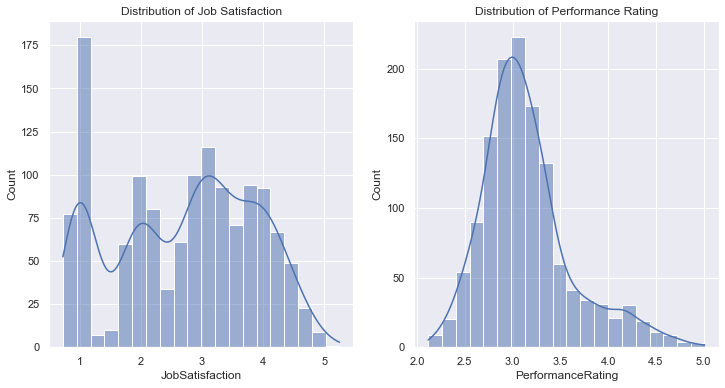

In [31]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

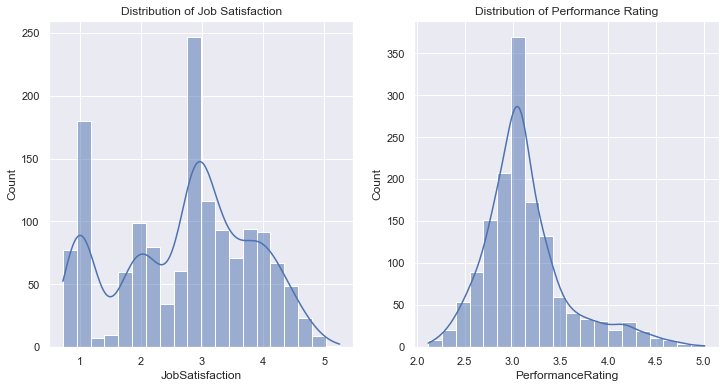

In [32]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df2['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df2['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

- Conclusion

This approach of using the median to fill in the null values is usually a good strategy when we are working with a collection of data from a survey because this type of data set usually follows a normal distribution where most of the answers given are common to all participants.
However, although this is true when analysing the performance ratings of all employees in the company, it is not the same when analysing the distribution of responses about job satisfaction, where there seems to be a wider and more dispersed opinion.

As we can see, using the median to fill in the null values is effective when working with data that follow a normal distribution, but since the purpose of the project is to study how to increase performance rating but also how to increase job satisfaction without affecting the scattered nature of this second is quite important and so it was decided to proceed with a more advanced way of filling in the null values.

> 1.3.6 Handling missing values in numerical features (II)

To maintain the original spread and distribution of the data, we are considering using a more sophisticated imputation method that takes into account the data's variability. One such method is Multiple Imputation.

Multiple Imputation is a statistical technique that fills in missing values multiple times to create several complete datasets. The final imputation is obtained by averaging these datasets. This method is beneficial because it preserves the natural variance in the data.

In [33]:
df3 = df.copy()

# Selecting categorical columns
categorical_columns = df3.select_dtypes(include=['object']).columns

# Fill missing values with 'Missing' and apply one-hot encoding in one step
for col in categorical_columns:
    # Filling missing values
    df3[col] = df3[col].fillna('Missing')
    
    # Applying one-hot encoding
    #df3 = pd.concat([df3, pd.get_dummies(df3[col], prefix=col)], axis=1)
    
    # Dropping the original column
    #df3.drop(col, axis=1, inplace=True)

> 1.3.6.1 Iterative imputation

In [34]:
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

# Selecting numerical columns from df3
numerical_columns = df3.select_dtypes(include=['float64']).columns

# Applying the imputer to the numerical columns in df3
df3[numerical_columns] = iterative_imputer.fit_transform(df3[numerical_columns])

C:\Users\eduma\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


The Early Stopping Criterion is used by the imputer to check if it has reached convergence before the maximum number of iterations (max_iter). If the change in imputed values between iterations is below a certain threshold, the imputer stops iterating and considers it has converged.

 The warning message indicates that the imputer did not reach this convergence criterion within the specified number of iterations (10 in this case). Essentially, the imputed values were still changing significantly at iteration 10.

In [35]:
iterative_imputer = IterativeImputer(max_iter=20, random_state=0)

# Selecting numerical columns from df3
numerical_columns = df3.select_dtypes(include=['float64']).columns

# Applying the imputer to the numerical columns in df3
df3[numerical_columns] = iterative_imputer.fit_transform(df3[numerical_columns])

> 1.3.7 Dataset before (df) and after (df3) modifications comparation - Numerical features (II)

- Statistical comparison

Dataset before handling null values

In [36]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,3.149344,2.720431,80.241313,0.814757,11.426152,2.811756,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,0.476027,1.115959,8.022535,0.863076,8.075870,1.329044,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,2.845502,1.909010,74.882946,0.000000,5.953221,1.967328,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.335525,3.639961,85.664169,1.082523,15.324548,3.366949,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,36.848408,19.091844,17.273662,19.976003


Dataset after handling null values

In [37]:
df3.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.745122,802.048613,9.093934,2.925742,0.999297,1026.682035,2.726172,65.652344,2.742740,2.058640,...,3.146777,2.720818,80.241319,0.814110,11.349178,2.812320,6.950918,4.266871,2.180700,4.120740
std,9.601575,392.790376,7.758482,1.019299,0.094578,579.135828,1.071830,20.367753,0.726376,1.115109,...,0.458658,1.058940,7.611111,0.818955,7.945661,1.260926,5.981864,3.614672,3.135361,3.532733
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,2.116951,0.720696,53.793059,0.000000,-0.904343,0.000000,-1.362314,0.000000,-0.415079,-0.100943
25%,30.219032,502.681603,2.265377,2.200839,0.938491,539.350448,1.956071,49.027545,2.260665,1.058998,...,2.861565,1.967961,75.457008,0.000000,5.951018,2.012541,2.702215,1.854234,0.000000,1.726644
50%,35.146708,800.022718,7.871631,2.986715,0.998640,1026.643768,2.786815,65.520210,2.797066,1.922125,...,3.071178,2.806332,80.240988,0.872977,9.351738,2.794418,5.453049,3.049666,0.991595,2.960464
75%,42.423273,1101.063049,11.525354,3.598201,1.059647,1469.776833,3.501999,81.466110,3.139241,2.605966,...,3.328717,3.475659,84.947190,1.057531,15.114154,3.262780,9.413334,6.982035,2.927613,6.920947
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,36.848408,19.091844,17.273662,19.976003


- Conclusion

Multiple Imputation is a statistical technique that uses the entire set of observed data to estimate the distributions of missing values while preserving the descriptive characteristics of the data. This approach ensures that the imputed values are consistent with the original data distribution, maintaining similar means, standard deviations, and quartiles. 

- Visual inspection

Dataset before handling null values

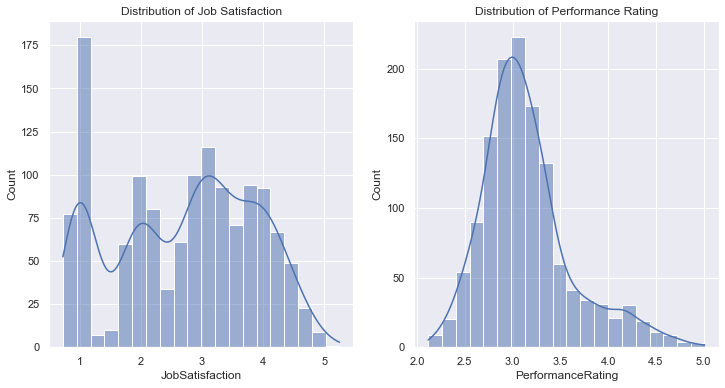

In [38]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

Dataset after handling null values

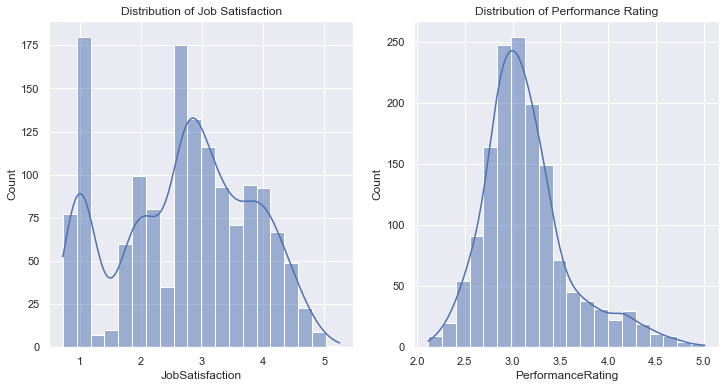

In [39]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df3['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df3['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

- Conclusion

As can be seen, using Multiple Imputation as a statistical technique to fill null values maintains the distribution and spread of the data. 
Therefore, we have decided to move forward with this technique for the numerical features and null values in our dataset combinded with labelling the null values for the categorical features previoulsly done.

- 1.4 Data  Overview - Visual analysis

In [40]:
overtime_counts = df3.groupby('OverTime')['Attrition'].value_counts().to_frame()
sizes = overtime_counts.values
labels = overtime_counts.index
labels = [labels[2][1], labels[3][1]]
overtime_counts

Attrition
OverTime Attrition           
Missing  No               109
         Yes               22
         Missing           16
No       No               715
         Yes              127
         Missing           87
Yes      No               241
         Yes              109
         Missing           44

> 1.4.1 Do overtime stresses employees and makes them have to leave?

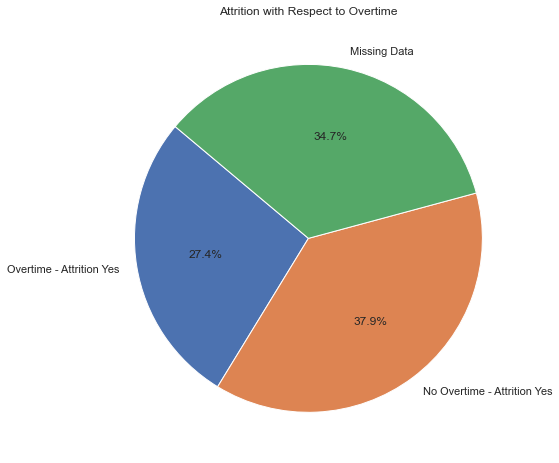

In [104]:
# Calculatinge counts
overtime_yes_count = df3[(df3['OverTime'] == 'Yes') & (df3['Attrition'] == 'Yes')].shape[0]
overtime_no_count = df3[(df3['OverTime'] == 'No') & (df3['Attrition'] == 'Yes')].shape[0]
missing_data_count = df3[df3['OverTime'] == 'Missing'].shape[0]

# Preparing data for the pie chart
sizes = [overtime_yes_count, overtime_no_count, missing_data_count]
labels = ['Overtime - Attrition Yes', 'No Overtime - Attrition Yes', 'Missing Data']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Attrition with Respect to Overtime')
plt.show()

- Conclusion:

The number of employees who decided to leave the company without working extra hours seems to be significant. This suggests that working extra hours may not have a direct impact on why employees choose to leave the company.

> 1.4.2 Is salary one of the main reasons?

In [106]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                1470 non-null   float64 
 1   DailyRate                          1470 non-null   float64 
 2   DistanceFromHome                   1470 non-null   float64 
 3   Education                          1470 non-null   float64 
 4   EducationField                     1470 non-null   object  
 5   EmployeeCount                      1470 non-null   float64 
 6   EmployeeNumber                     1470 non-null   float64 
 7   EnvironmentSatisfaction            1470 non-null   float64 
 8   HourlyRate                         1470 non-null   float64 
 9   JobInvolvement                     1470 non-null   float64 
 10  JobLevel                           1470 non-null   float64 
 11  JobSatisfaction                    1470 non

Text(0.5, 1.0, 'Ratio between Income and HourlyRate')

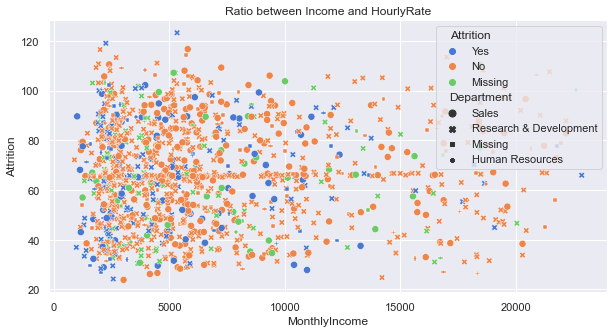

In [107]:
#Merging 'df3' with 'df2' on the 'EmployeeNumber' column
df3 = pd.merge(df3, df2[['EmployeeNumber', 'Department']], on='EmployeeNumber', how='inner')

plt.figure(figsize = (10,5))
sns.scatterplot(data=df3,x='MonthlyIncome',y='HourlyRate',hue="Attrition",style="Department",size="Department",sizes=(20,50), palette='muted')
plt.ylabel('Attrition')
plt.xlabel('MonthlyIncome')
plt.title("Ratio between Income and HourlyRate")

- Conclusion:

Since a smaller proportion of the company have a high hourly rate, most of the employees who decide to leave the company have an average income, which does not make the relationship between attrition and monthly income by departures insightful enough.

> 1.4.3 What is the effect of age on attrition?

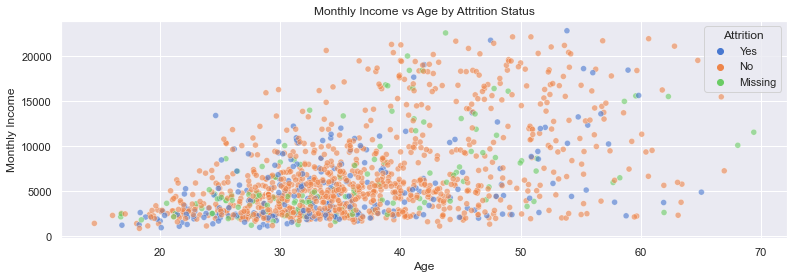

In [115]:
plt.figure(figsize=(13, 4))

sns.scatterplot(data=df3, x='Age', y='MonthlyIncome', hue="Attrition", palette='muted', alpha=0.6)

plt.ylabel('Monthly Income')
plt.xlabel('Age')
plt.title("Monthly Income vs Age by Attrition Status")
plt.legend(title='Attrition', loc='upper right')
plt.show()

- Conclusion:

Apparently, it is mainly young people who are leaving the company.

> 1.4.4 What is the most job role of attritions ?

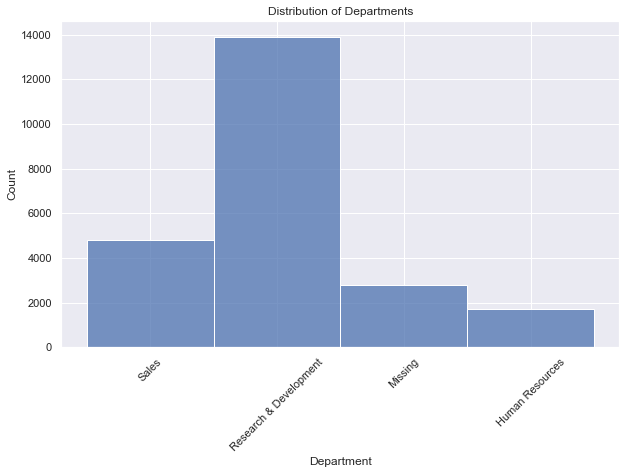

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df3, x='Department', bins=len(df3['Department'].unique()), kde=False)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution of Departments')
plt.xticks(rotation=45)
plt.show()

- Conclusion:

The department with more employees in Research & Development

## 2. Statistics Analysis

- 2.1 Statistics Analysis (I)

> 2.1.1 Correlation Overview

The first analysis that has been decided to be carried out is a correlation analysis to explore the relationships between numerical variables.
The purpose is to determine if there is any correlation between job satisfaction and performance rating with any of the other questions answered that could explain why some employees seem to be more satisfied and perform better than others.

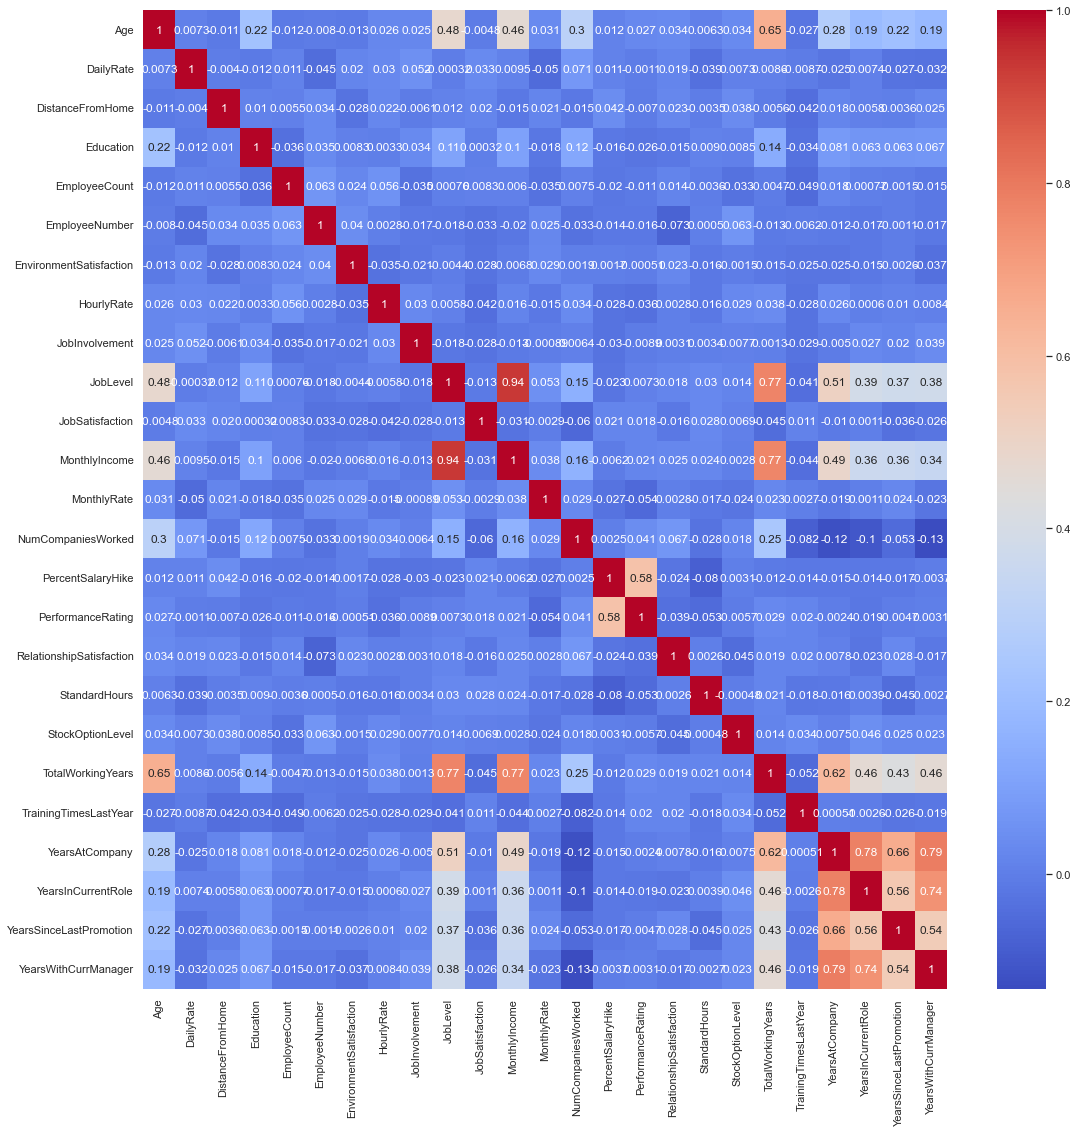

In [42]:
plt.figure(figsize = (18,18))

sns.heatmap(df3.corr(),annot= True, cmap = "coolwarm")

plt.show()

Upon initial review, the correlation encountered does not provide any insights to our questions. How can employee satisfaction and performance be improved?

The application of correlation techniques requires numerical input. It has been decided to perform:

    - One-hot coding= Numerical nominal features.

    - Mapping= Numerical ordinal features.

> 2.1.2 Correlation - JobSatisfaction

In [43]:
# Calculating the correlation matrix for the DataFrame 'df3'
correlation_matrix = df3.corr()

# Extracting the correlation values and storing them
correlation_with_jobsatisfaction= correlation_matrix["JobSatisfaction"]

# Sorting the correlation values in ascending order
sorted_correlation = correlation_with_jobsatisfaction.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

TotalWorkingYears          -0.044637
HourlyRate                 -0.041557
YearsSinceLastPromotion    -0.036336
EmployeeNumber             -0.033100
MonthlyIncome              -0.030737
JobInvolvement             -0.027804
EnvironmentSatisfaction    -0.027706
YearsWithCurrManager       -0.026230
RelationshipSatisfaction   -0.015539
JobLevel                   -0.012566
Name: JobSatisfaction, dtype: float64

In [44]:
correlation_with_jobsatisfaction= correlation_matrix["JobSatisfaction"]
sorted_correlation = correlation_with_jobsatisfaction.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

TotalWorkingYears          -0.044637
HourlyRate                 -0.041557
YearsSinceLastPromotion    -0.036336
EmployeeNumber             -0.033100
MonthlyIncome              -0.030737
JobInvolvement             -0.027804
EnvironmentSatisfaction    -0.027706
YearsWithCurrManager       -0.026230
RelationshipSatisfaction   -0.015539
JobLevel                   -0.012566
Name: JobSatisfaction, dtype: float64

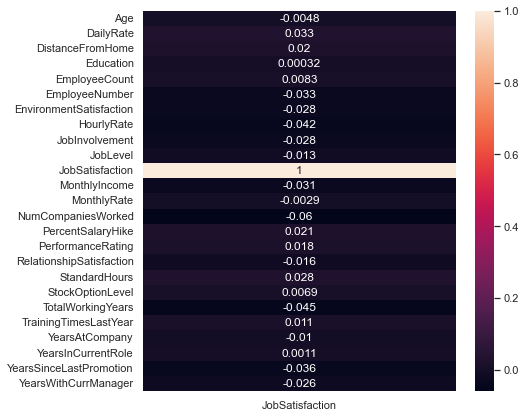

In [45]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["JobSatisfaction"]], annot=True)
plt.show()

- Conclusion:

There seems to be no significant correlation between job satisfaction and the other survey questions. 

> 2.1.3 Correlation - Performance Rating

In [46]:
correlation_with_performancerating= correlation_matrix["PerformanceRating"]
sorted_correlation = correlation_with_performancerating.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

StandardHours              -0.052811
RelationshipSatisfaction   -0.039262
HourlyRate                 -0.036009
Education                  -0.025675
YearsInCurrentRole         -0.018544
EmployeeNumber             -0.016004
EmployeeCount              -0.011469
JobInvolvement             -0.008920
DistanceFromHome           -0.006999
StockOptionLevel           -0.005742
Name: PerformanceRating, dtype: float64

In [47]:
correlation_with_performancerating= correlation_matrix["PerformanceRating"]
sorted_correlation = correlation_with_performancerating.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

PercentSalaryHike          0.581112
NumCompaniesWorked         0.040551
TotalWorkingYears          0.028735
Age                        0.026553
MonthlyIncome              0.020666
TrainingTimesLastYear      0.020289
JobSatisfaction            0.018336
JobLevel                   0.007339
YearsWithCurrManager       0.003148
EnvironmentSatisfaction   -0.000510
Name: PerformanceRating, dtype: float64

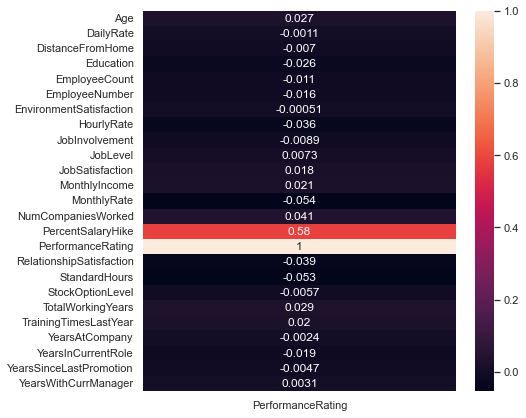

In [48]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["PerformanceRating"]], annot=True)
plt.show()

- Conclusion

There is no significant correlation between job satisfaction and the other questions, except for percent salary hike. This means that salary increases are determined based on the reasons for the performance rating.

> 2.1.4 Correlation - Attrition Yes

In [49]:
df3 = pd.get_dummies(df3, columns=['Attrition'])
correlation_matrix = df3.corr()

correlation_with_attrition_yes= correlation_matrix["Attrition_Yes"]
sorted_correlation = correlation_with_attrition_yes.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

Attrition_Missing      -0.153793
TotalWorkingYears      -0.130635
JobLevel               -0.128320
MonthlyIncome          -0.122749
YearsWithCurrManager   -0.101696
YearsInCurrentRole     -0.100737
Age                    -0.096174
YearsAtCompany         -0.094171
StockOptionLevel       -0.086762
JobInvolvement         -0.073902
Name: Attrition_Yes, dtype: float64

In [50]:
correlation_with_attrition_yes= correlation_matrix["Attrition_Yes"]
sorted_correlation = correlation_with_attrition_yes.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

DistanceFromHome      0.046627
NumCompaniesWorked    0.032419
StandardHours         0.031174
MonthlyRate           0.022703
PercentSalaryHike     0.016725
PerformanceRating     0.013361
Education            -0.002790
EmployeeCount        -0.021305
EmployeeNumber       -0.022296
HourlyRate           -0.026854
Name: Attrition_Yes, dtype: float64

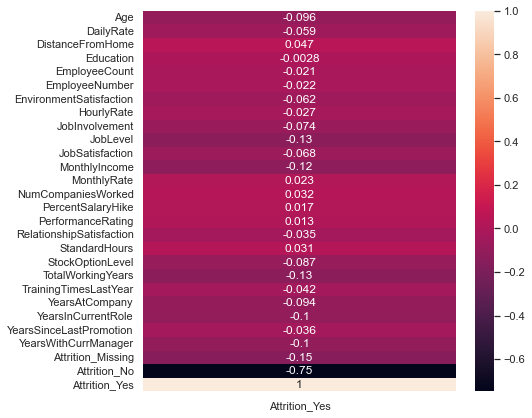

In [51]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["Attrition_Yes"]], annot=True)
plt.show()

- Conclusion:

There seems to be no significant correlation between job satisfaction and the other survey questions. 

> 2.1.5 Correlation - Environment Satisfaction

In [52]:
correlation_with_environmentsatisfaction= correlation_matrix["EnvironmentSatisfaction"]
sorted_correlation = correlation_with_environmentsatisfaction.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

YearsWithCurrManager    -0.036989
HourlyRate              -0.034941
DistanceFromHome        -0.028429
JobSatisfaction         -0.027706
TrainingTimesLastYear   -0.025480
YearsAtCompany          -0.025208
JobInvolvement          -0.020768
StandardHours           -0.016322
YearsInCurrentRole      -0.015265
TotalWorkingYears       -0.014750
Name: EnvironmentSatisfaction, dtype: float64

In [53]:
correlation_with_environmentsatisfaction= correlation_matrix["EnvironmentSatisfaction"]
sorted_correlation = correlation_with_environmentsatisfaction.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

Attrition_Missing           0.048385
EmployeeNumber              0.040321
MonthlyRate                 0.028865
EmployeeCount               0.023857
RelationshipSatisfaction    0.022858
Attrition_No                0.020713
DailyRate                   0.020457
Education                   0.008343
NumCompaniesWorked          0.001897
PercentSalaryHike           0.001714
Name: EnvironmentSatisfaction, dtype: float64

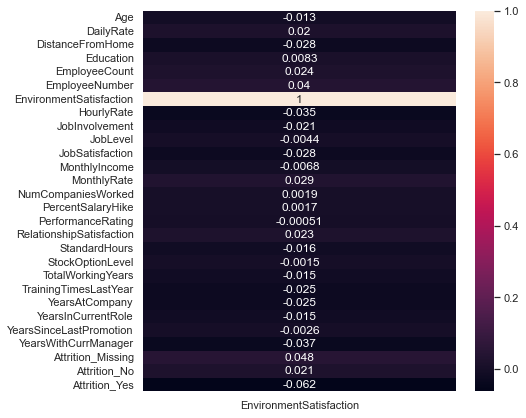

In [54]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["EnvironmentSatisfaction"]], annot=True)
plt.show()

- Conclusion

No insighful correlation with other answers.

> 2.1.6 Correlation - Distance From Home

In [55]:
correlation_with_disistancefromhome= correlation_matrix["DistanceFromHome"]
sorted_correlation = correlation_with_disistancefromhome.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

TrainingTimesLastYear     -0.042237
EnvironmentSatisfaction   -0.028429
NumCompaniesWorked        -0.014627
MonthlyIncome             -0.014598
Age                       -0.010935
PerformanceRating         -0.006999
JobInvolvement            -0.006053
TotalWorkingYears         -0.005562
DailyRate                 -0.004022
StandardHours             -0.003512
Name: DistanceFromHome, dtype: float64

In [56]:
correlation_with_disistancefromhome= correlation_matrix["DistanceFromHome"]
sorted_correlation = correlation_with_disistancefromhome.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

Attrition_Yes               0.046627
PercentSalaryHike           0.042288
StockOptionLevel            0.037986
EmployeeNumber              0.034452
YearsWithCurrManager        0.025265
RelationshipSatisfaction    0.022914
HourlyRate                  0.022462
Attrition_Missing           0.021448
MonthlyRate                 0.020783
JobSatisfaction             0.019774
Name: DistanceFromHome, dtype: float64

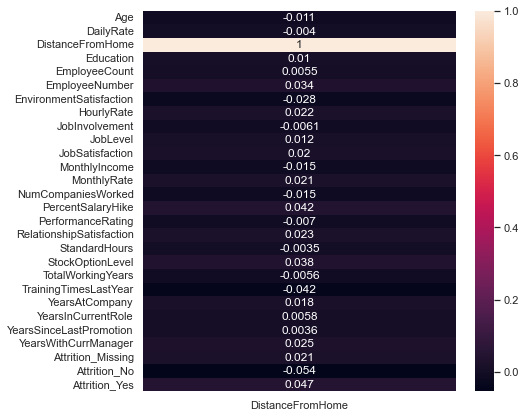

In [57]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["DistanceFromHome"]], annot=True)
plt.show()

- Conclusion

No insighful correlation with other answers.

> 2.1.7 Correlation - Years In Current Role

In [58]:
correlation_with_yearsincurrentrole= correlation_matrix["YearsInCurrentRole"]
sorted_correlation = correlation_with_yearsincurrentrole.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

Attrition_Yes              -0.100737
RelationshipSatisfaction   -0.023417
PerformanceRating          -0.018544
EmployeeNumber             -0.016563
EnvironmentSatisfaction    -0.015265
PercentSalaryHike          -0.014335
TrainingTimesLastYear      -0.002616
Attrition_Missing          -0.001577
HourlyRate                  0.000597
EmployeeCount               0.000766
Name: YearsInCurrentRole, dtype: float64

In [59]:
correlation_with_yearswithcurrmanager= correlation_matrix["YearsInCurrentRole"]
sorted_correlation = correlation_with_yearswithcurrmanager.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

YearsAtCompany             0.778871
YearsWithCurrManager       0.735913
YearsSinceLastPromotion    0.558325
TotalWorkingYears          0.462966
JobLevel                   0.387724
MonthlyIncome              0.361892
Age                        0.192335
Attrition_No               0.086831
Education                  0.063202
StockOptionLevel           0.045824
Name: YearsInCurrentRole, dtype: float64

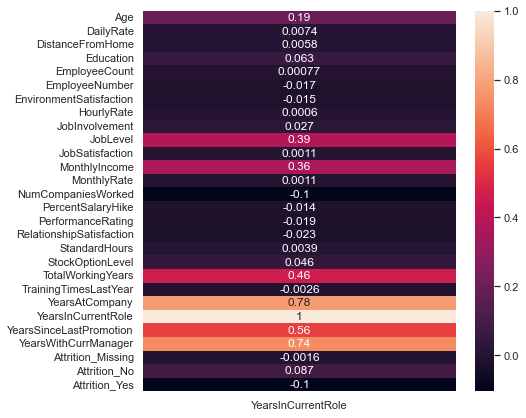

In [60]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["YearsInCurrentRole"]], annot=True)
plt.show()

- Conclusion

There appears to be a correlation between the number of years employees have been with the company and the number of promotions they have received, as well as the amount of time they have spent with the same manager.

    -  The longer an employee remains in their current role, the more likely they are to have spent a significant amount of time with the company and their current manager, and it's been a while since their last promotion. 
    
Furthermore, there appears to be an inverse correlation with Attrition_Yes.

    -  Employees who have been in their current role for a longer period are less likely to leave the company. This suggests that employees who stay with the company for a longer period may become more complacent.
    
Although there does not appear to be a direct correlation between these characteristics and employee satisfaction, turnover or performance, this could be a matter for study and consideration as to whether the company should invest more in career development opportunities.

However, further analysis will be performed.

> 2.1.8 Correlation - Years With Current Manager

In [61]:
correlation_with_yearswithcurrmanager= correlation_matrix["YearsWithCurrManager"]
sorted_correlation = correlation_with_yearswithcurrmanager.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

Attrition_Yes              -0.101696
EnvironmentSatisfaction    -0.036989
DailyRate                  -0.032025
Attrition_Missing          -0.031675
JobSatisfaction            -0.026230
MonthlyRate                -0.022516
TrainingTimesLastYear      -0.018969
EmployeeNumber             -0.017233
RelationshipSatisfaction   -0.017187
EmployeeCount              -0.014865
Name: YearsWithCurrManager, dtype: float64

In [62]:
correlation_with_businesstravel_non_travel= correlation_matrix["YearsWithCurrManager"]
sorted_correlation = correlation_with_businesstravel_non_travel.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

YearsAtCompany             0.790917
YearsInCurrentRole         0.735913
YearsSinceLastPromotion    0.543185
TotalWorkingYears          0.463290
JobLevel                   0.376590
MonthlyIncome              0.341834
Age                        0.187343
Attrition_No               0.107859
Education                  0.066928
JobInvolvement             0.039126
Name: YearsWithCurrManager, dtype: float64

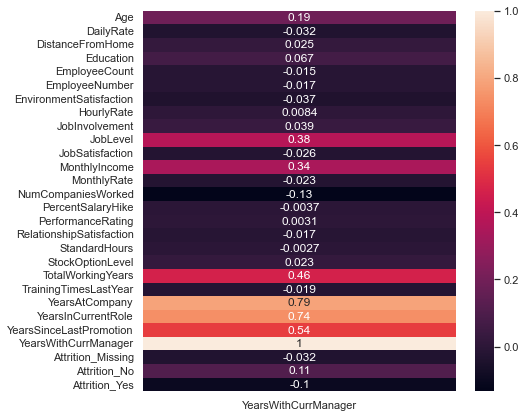

In [63]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["YearsWithCurrManager"]], annot=True)
plt.show()

- Conclusion

There is a correlation between the length of time an employee works with the same manager, the length of time they remain in the same role, and the time since their last promotion. 
    
    -   This patter can suggests that there is a strong relationship between the posibilites to wrong in the company and having a stable relationship with their manager.
    
    
These factors suggest that the company should develop strategies to improve employee career development, rather than relying solely on the interpersonal relationship between manager and employee. A more professional and established approach should be taken.

> 2.1.9 Correlation - BusinessTravel - Non Travel

In [64]:
df3 = pd.get_dummies(df3, columns=['BusinessTravel'])
correlation_matrix = df3.corr()

correlation_with_businesstravel_non_travel= correlation_matrix["BusinessTravel_Non-Travel"]
sorted_correlation = correlation_with_businesstravel_non_travel.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

BusinessTravel_Travel_Frequently   -0.165569
BusinessTravel_Missing             -0.114028
Attrition_Yes                      -0.046882
JobInvolvement                     -0.046058
MonthlyIncome                      -0.023895
EnvironmentSatisfaction            -0.015572
TrainingTimesLastYear              -0.012017
TotalWorkingYears                  -0.011146
YearsAtCompany                     -0.008903
JobLevel                           -0.006896
Name: BusinessTravel_Non-Travel, dtype: float64

In [65]:
correlation_with_businesstravel_non_travel= correlation_matrix["BusinessTravel_Non-Travel"]
sorted_correlation = correlation_with_businesstravel_non_travel.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

StockOptionLevel            0.050161
RelationshipSatisfaction    0.042764
YearsSinceLastPromotion     0.041302
NumCompaniesWorked          0.040773
EmployeeNumber              0.039545
PercentSalaryHike           0.039162
Attrition_Missing           0.034060
DailyRate                   0.025451
EmployeeCount               0.023017
PerformanceRating           0.022583
Name: BusinessTravel_Non-Travel, dtype: float64

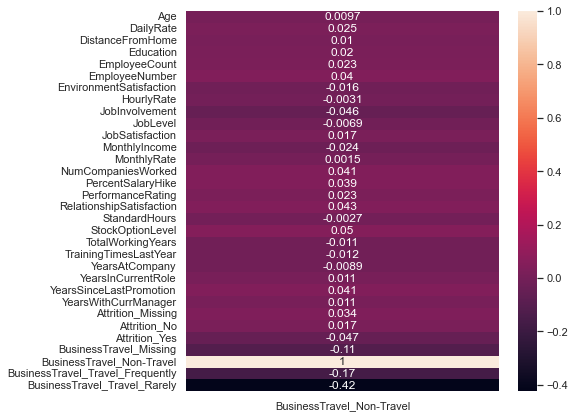

In [66]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["BusinessTravel_Non-Travel"]], annot=True)
plt.show()

- Conclusion

No insighful correlation with other answers.

> 2.1.10 Correlation - Years At Company

In [67]:
correlation_with_yearsatcompany = correlation_matrix["YearsAtCompany"]
sorted_correlation = correlation_with_yearsatcompany.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

Attrition_Yes                      -0.094171
DailyRate                          -0.025422
EnvironmentSatisfaction            -0.025208
MonthlyRate                        -0.018945
StandardHours                      -0.016072
PercentSalaryHike                  -0.014755
EmployeeNumber                     -0.011726
BusinessTravel_Travel_Frequently   -0.011003
JobSatisfaction                    -0.010324
BusinessTravel_Non-Travel          -0.008903
Name: YearsAtCompany, dtype: float64

In [68]:
correlation_with_yearsatcompany = correlation_matrix["YearsAtCompany"]
sorted_correlation = correlation_with_yearsatcompany.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

YearsWithCurrManager       0.790917
YearsInCurrentRole         0.778871
YearsSinceLastPromotion    0.659899
TotalWorkingYears          0.617017
JobLevel                   0.514656
MonthlyIncome              0.490258
Age                        0.277637
Attrition_No               0.086159
Education                  0.081000
HourlyRate                 0.026443
Name: YearsAtCompany, dtype: float64

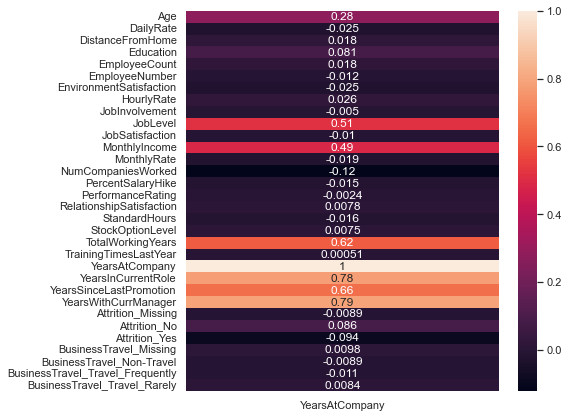

In [69]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["YearsAtCompany"]], annot=True)
plt.show()

- Conclusion

There appears to be a correlation with the amount of time remaining with the same Manager, in the same role and since last promotion.
    
    - This suggests that employees are experiencing longer intervals since their last promotion and professional development in the organisation, and are staying in the same role for longer periods of time.

These factors suggest that the company should develop strategies to improve employee career development.

> 2.1.11 Correlation - Stock Option Level

In [70]:
correlation_with_stockoptionlevel = correlation_matrix["StockOptionLevel"]
sorted_correlation = correlation_with_stockoptionlevel.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

BusinessTravel_Missing         -0.047976
RelationshipSatisfaction       -0.045302
Attrition_Missing              -0.038332
EmployeeCount                  -0.032704
MonthlyRate                    -0.024320
BusinessTravel_Travel_Rarely   -0.009166
PerformanceRating              -0.005742
EnvironmentSatisfaction        -0.001476
StandardHours                  -0.000481
MonthlyIncome                   0.002843
Name: StockOptionLevel, dtype: float64

In [71]:
correlation_with_stockoptionlevel = correlation_matrix["StockOptionLevel"]
sorted_correlation = correlation_with_stockoptionlevel.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

Attrition_No                 0.099613
EmployeeNumber               0.063185
BusinessTravel_Non-Travel    0.050161
YearsInCurrentRole           0.045824
DistanceFromHome             0.037986
TrainingTimesLastYear        0.033984
Age                          0.033624
HourlyRate                   0.028964
YearsSinceLastPromotion      0.024688
YearsWithCurrManager         0.023442
Name: StockOptionLevel, dtype: float64

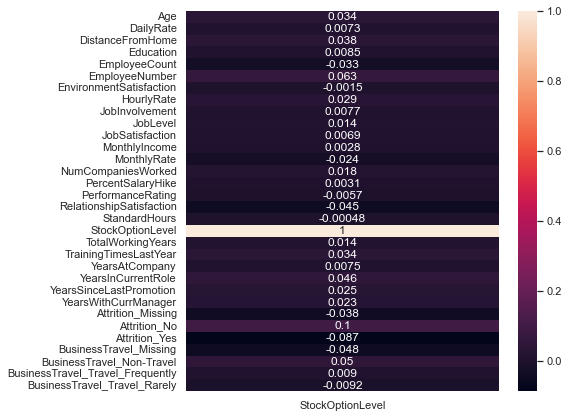

In [72]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["StockOptionLevel"]], annot=True)
plt.show()

- Conclusion:

There seems to be no significant correlation between job satisfaction and the other survey questions. 

> 2.1.12 Correlation - Training Times Last Year

In [73]:
correlation_with_trainingtimeslastyear = correlation_matrix["TrainingTimesLastYear"]
sorted_correlation = correlation_with_trainingtimeslastyear.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

TotalWorkingYears   -0.051843
EmployeeCount       -0.049380
MonthlyIncome       -0.044109
DistanceFromHome    -0.042237
Attrition_Yes       -0.041667
JobLevel            -0.041421
Education           -0.034347
JobInvolvement      -0.029242
HourlyRate          -0.028154
Age                 -0.026555
Name: TrainingTimesLastYear, dtype: float64

In [74]:
correlation_with_trainingtimeslastyear = correlation_matrix["TrainingTimesLastYear"]
sorted_correlation = correlation_with_trainingtimeslastyear.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

Attrition_No                        0.036764
StockOptionLevel                    0.033984
PerformanceRating                   0.020289
RelationshipSatisfaction            0.019745
BusinessTravel_Missing              0.016123
JobSatisfaction                     0.010887
BusinessTravel_Travel_Frequently    0.008133
MonthlyRate                         0.002665
YearsAtCompany                      0.000505
Attrition_Missing                  -0.001917
Name: TrainingTimesLastYear, dtype: float64

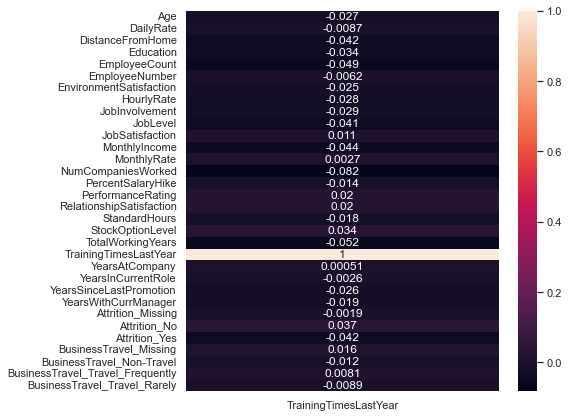

In [75]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["TrainingTimesLastYear"]], annot=True)
plt.show()

- Conclusion:

There seems to be no significant correlation between job satisfaction and the other survey questions. 

> 2.1.13 Correlation - Department

> 2.1.13.1 Correlation - Department - Sales

In [76]:
df3 = pd.get_dummies(df3, columns=['Department'])
correlation_matrix = df3.corr()

correlation_with_research_director = correlation_matrix["Department_Sales"]
sorted_correlation = correlation_with_research_director.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

Department_Missing             -0.201357
Department_Human Resources     -0.168397
PerformanceRating              -0.047274
NumCompaniesWorked             -0.028682
Attrition_No                   -0.023135
BusinessTravel_Travel_Rarely   -0.021822
StockOptionLevel               -0.021559
StandardHours                  -0.021220
EmployeeCount                  -0.019666
EnvironmentSatisfaction        -0.019578
Name: Department_Sales, dtype: float64

In [77]:
correlation_with_department_sales = correlation_matrix["Department_Sales"]
sorted_correlation = correlation_with_department_sales.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

JobLevel                     0.084121
MonthlyIncome                0.056106
BusinessTravel_Non-Travel    0.044311
Attrition_Yes                0.032424
YearsWithCurrManager         0.030585
JobSatisfaction              0.027394
YearsInCurrentRole           0.026402
TrainingTimesLastYear        0.025813
MonthlyRate                  0.024520
DistanceFromHome             0.021673
Name: Department_Sales, dtype: float64

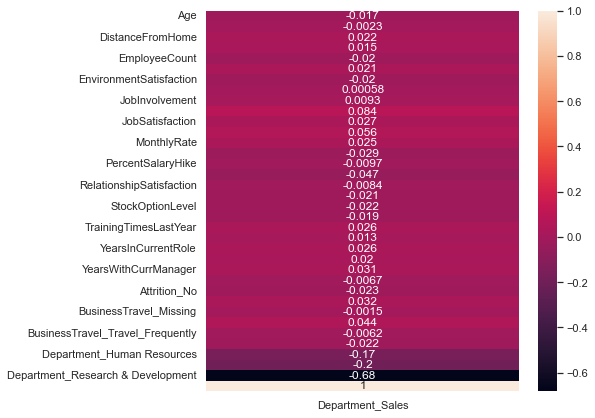

In [78]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["Department_Sales"]], annot=True)
plt.show()

- Conclusion

No insighful correlation with other answers.

> 2.1.13.2 Correlation - Department - Research & Development

In [79]:
correlation_with_department_desearch_development = correlation_matrix["Department_Research & Development"]
sorted_correlation = correlation_with_department_desearch_development.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

Department_Missing           -0.376466
Department_Human Resources   -0.314842
JobLevel                     -0.079622
Attrition_Yes                -0.077900
Education                    -0.055170
MonthlyIncome                -0.052572
EmployeeNumber               -0.051352
YearsSinceLastPromotion      -0.048406
BusinessTravel_Missing       -0.029240
HourlyRate                   -0.026933
Name: Department_Research & Development, dtype: float64

In [80]:
correlation_with_research_director = correlation_matrix["Department_Research & Development"]
sorted_correlation = correlation_with_research_director.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

Attrition_No                    0.055284
PercentSalaryHike               0.049261
BusinessTravel_Travel_Rarely    0.047998
PerformanceRating               0.035912
DailyRate                       0.032084
StandardHours                   0.025267
StockOptionLevel                0.019496
Attrition_Missing               0.016448
EmployeeCount                   0.016394
NumCompaniesWorked              0.009666
Name: Department_Research & Development, dtype: float64

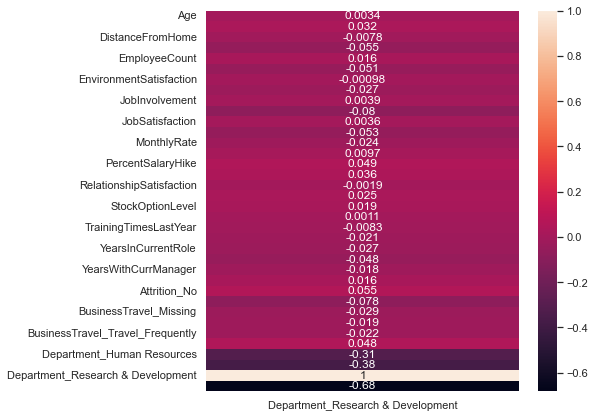

In [81]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["Department_Research & Development"]], annot=True)
plt.show()

- Conclusion:

There seems to be no significant correlation between job satisfaction and the other survey questions. 

> 2.1.13.3 Correlation - Department - Human Resources

In [82]:
correlation_with_department_human_resources = correlation_matrix["Department_Human Resources"]
sorted_correlation = correlation_with_department_human_resources.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

Department_Sales               -0.168397
Department_Missing             -0.092923
JobSatisfaction                -0.061040
PercentSalaryHike              -0.039322
DailyRate                      -0.035470
Attrition_No                   -0.022345
TrainingTimesLastYear          -0.021352
DistanceFromHome               -0.019265
BusinessTravel_Travel_Rarely   -0.017094
EmployeeCount                  -0.010112
Name: Department_Human Resources, dtype: float64

In [83]:
correlation_with_research_director = correlation_matrix["Department_Human Resources"]
sorted_correlation = correlation_with_research_director.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

JobInvolvement              0.042322
YearsAtCompany              0.029334
EmployeeNumber              0.025800
NumCompaniesWorked          0.020665
PerformanceRating           0.020361
Education                   0.020052
StockOptionLevel            0.019541
StandardHours               0.019416
RelationshipSatisfaction    0.018000
MonthlyRate                 0.017667
Name: Department_Human Resources, dtype: float64

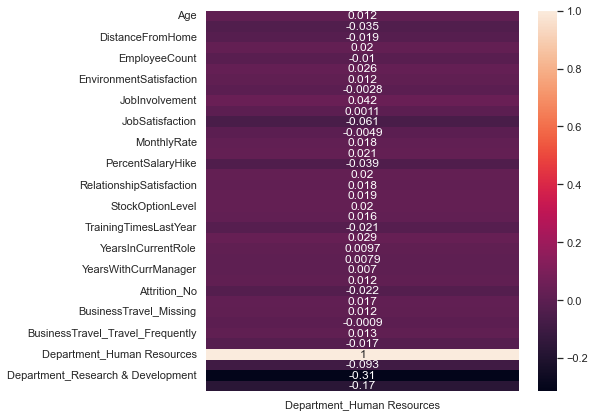

In [84]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["Department_Human Resources"]], annot=True)
plt.show()

- Conclusion:

There seems to be no significant correlation between job satisfaction and the other survey questions. 

> 2.1.14 Correlation - JobRole

> 2.1.14.1 Correlation - JobRole - Research Director

In [85]:
df3 = pd.get_dummies(df3, columns=['JobRole'])
correlation_matrix = df3.corr()

correlation_with_jobrole_research_director = correlation_matrix["JobRole_Research Director"]
sorted_correlation = correlation_with_jobrole_research_director.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

MonthlyIncome                        0.364255
JobLevel                             0.331426
TotalWorkingYears                    0.232121
Age                                  0.127082
Department_Research & Development    0.121787
YearsWithCurrManager                 0.116837
YearsAtCompany                       0.114474
YearsInCurrentRole                   0.088169
NumCompaniesWorked                   0.087003
Attrition_No                         0.053971
Name: JobRole_Research Director, dtype: float64

In [86]:
correlation_with_jobrole_research_director = correlation_matrix["JobRole_Research Director"]
sorted_correlation = correlation_with_jobrole_research_director.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

Department_Sales                    -0.111040
JobRole_Research Scientist          -0.110427
JobRole_Laboratory Technician       -0.103055
JobRole_Missing                     -0.079968
JobRole_Manufacturing Director      -0.072173
JobRole_Healthcare Representative   -0.070875
JobRole_Manager                     -0.065162
JobRole_Sales Representative        -0.055626
JobRole_Human Resources             -0.049488
BusinessTravel_Non-Travel           -0.042899
Name: JobRole_Research Director, dtype: float64

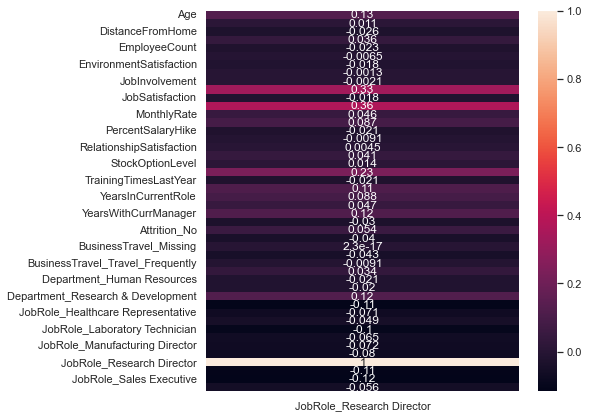

In [87]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["JobRole_Research Director"]], annot=True)
plt.show()

- Conclusion:

There seems to be no significant correlation between job satisfaction and the other survey questions. 

> 2.1.14.2 Correlation - JobRole - Manufacturing Director

In [88]:
correlation_with_research_scientist = correlation_matrix["JobRole_Manufacturing Director"]
sorted_correlation = correlation_with_research_scientist.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

Department_Research & Development    0.142163
JobLevel                             0.100207
YearsInCurrentRole                   0.072682
YearsWithCurrManager                 0.070187
TotalWorkingYears                    0.069053
MonthlyIncome                        0.058153
YearsAtCompany                       0.055897
Age                                  0.048933
PercentSalaryHike                    0.046117
EnvironmentSatisfaction              0.032574
Name: JobRole_Manufacturing Director, dtype: float64

In [89]:
correlation_with_research_scientist = correlation_matrix["JobRole_Manufacturing Director"]
sorted_correlation = correlation_with_research_scientist.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

Department_Sales                    -0.142727
JobRole_Research Scientist          -0.138475
JobRole_Laboratory Technician       -0.129231
JobRole_Missing                     -0.100280
JobRole_Healthcare Representative   -0.088877
JobRole_Manager                     -0.081714
JobRole_Research Director           -0.072173
JobRole_Sales Representative        -0.069756
JobRole_Human Resources             -0.062058
Attrition_Yes                       -0.048049
Name: JobRole_Manufacturing Director, dtype: float64

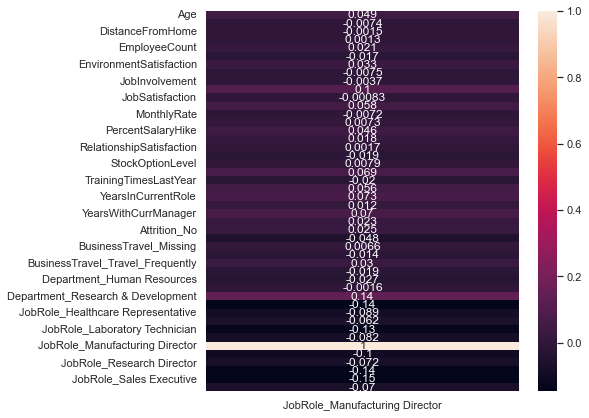

In [90]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["JobRole_Manufacturing Director"]], annot=True)
plt.show()

- Conclusion:

There seems to be no significant correlation between job satisfaction and the other survey questions. 

> 2.1.14.3 Correlation - JobRole - Sales Executive

In [91]:
correlation_with_sales_executive = correlation_matrix["JobRole_Sales Executive"]
sorted_correlation = correlation_with_sales_executive.sort_values(ascending=True)
top_10_features = sorted_correlation[1:11]
top_10_features

JobRole_Research Scientist          -0.223768
JobRole_Laboratory Technician       -0.208831
JobRole_Missing                     -0.162047
JobRole_Manufacturing Director      -0.146250
JobRole_Healthcare Representative   -0.143620
JobRole_Manager                     -0.132045
JobRole_Research Director           -0.116627
JobRole_Sales Representative        -0.112721
JobRole_Human Resources             -0.100283
Department_Human Resources          -0.068639
Name: JobRole_Sales Executive, dtype: float64

In [92]:
correlation_with_sales_executive = correlation_matrix["JobRole_Sales Executive"]
sorted_correlation = correlation_with_sales_executive.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]
top_10_features

Department_Sales        0.566323
JobLevel                0.106056
YearsInCurrentRole      0.076143
YearsWithCurrManager    0.061855
MonthlyIncome           0.055197
Education               0.054869
YearsAtCompany          0.042725
Department_Missing      0.039791
Attrition_Yes           0.030387
JobSatisfaction         0.025636
Name: JobRole_Sales Executive, dtype: float64

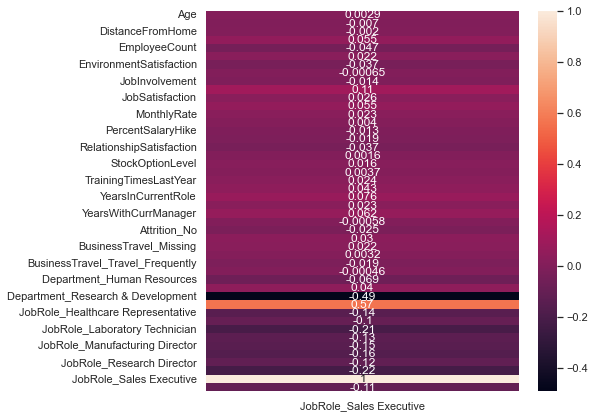

In [93]:
plt.figure(figsize=(7,7))
sns.heatmap(df3.corr()[["JobRole_Sales Executive"]], annot=True)
plt.show()

- Conclusion

There is a clear positive correlation between job level and sales executive roles within the sales hierarchy. Additionally, factors such as time spent in their current role, current manager, and monthly income show that Sales Executives typically have job stability and a certain level of income and job security.

Although there appears to be a negative correlation between these roles and the main activities of the company, such as technical areas, manufacturing, and healthcare.

This suggests that the sales department has significant potential to be included in an employee's career development plan. Involving employees in sales roles could be viewed as a strategy to create stronger connections between departments, providing more opportunities for increasing income and knowledge gain.

- 2.2 Statistics Analysis (II)

> 2.2.1 T-test

We are using a t-test to compare the average job satisfaction between two groups, such as male and female employees.

> 2.2.1.1 T-test | Age - Attrition

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the average age of employees between the two attrition groups.

Alternative Hypothesis (H1): There is a significant difference in the average age of employees between the two attrition groups.

In [94]:
#Merging 'df3' with 'df2' on the 'EmployeeNumber' column
df3 = pd.merge(df3, df2[['EmployeeNumber', 'Attrition']], on='EmployeeNumber', how='inner')

# Filtering data based on attrition
attrition_yes_age = df3[df3['Attrition'] == 'Yes']['Age']
attrition_no_age = df3[df3['Attrition'] == 'No']['Age']

# Performing t-test
t_stat_age, p_val_age = stats.ttest_ind(attrition_yes_age, attrition_no_age)

# Printing the results
print(f"T-Statistic for Age: {t_stat_age}, P-Value: {p_val_age}")

T-Statistic for Age: -3.3514082845782953, P-Value: 0.0008267367692839238


- Conclusion

Given the low P-Value, we reject the null hypothesis (H0) which stated there is no significant difference in the average age of employees between the two attrition groups.

The negative T-Statistic value (-3.35) indicates that the average age of employees who have left the company ('Yes' to attrition) is lower than that of the employees who haven't left ('No' to attrition).

The P-Value of 0.00084 is significantly less than the common alpha level of 0.05. This low P-Value indicates that the observed difference in ages between the two groups is statistically significant.

- Possible solutions

Career Development Opportunities

Younger employees often seek opportunities for growth and learning. To retain them, implement robust career development programs, such as mentorship, training sessions, and clear pathways for advancement.

Recognition and Feedback

Regular recognition and constructive feedback can increase job satisfaction. It is important to note that younger employees often value frequent feedback and acknowledgment of their contributions.

> 2.2.1.2 T-test | DistanceFromHome - Attrition

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the average distance from home of employees between the two attrition groups.

Alternative Hypothesis (H1): There is a significant difference in the average distance from home between the two attrition groups.

In [95]:
# Filtering data based on attrition
attrition_yes_distance = df3[df3['Attrition'] == 'Yes']['DistanceFromHome']
attrition_no_distance = df3[df3['Attrition'] == 'No']['DistanceFromHome']

# Performing t-test
t_stat_distance, p_val_distance = stats.ttest_ind(attrition_yes_distance, attrition_no_distance)

# Printing the results
print(f"T-Statistic for Distance: {t_stat_distance}, P-Value: {p_val_distance}")

T-Statistic for Distance: 1.9036560080490232, P-Value: 0.0571721400501598


- Conclusion

The T-Statistic value of 1.903 is positive, indicating that employees who have left the company (Attrition = 'Yes') have a higher average distance from home than those who haven't left (Attrition = 'No').

The P-Value is marginally above 0.05, so we cannot confidently reject the null hypothesis (H0), which posits no significant difference in the average distance from home of employees between the two attrition groups.

The results indicate that although employees who left the company tend to live slightly farther away from work than those who stayed, this trend is not statistically significant.

> 2.2.1.3 T-test | Standard Hours - Attrition

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the 'StandardHours' between employees who left and those who stayed.

Alternative Hypothesis (H1): There is a significant difference in the 'StandardHours' between employees who left and those who stayed.

In [96]:
# Filtering data based on attrition
attrition_yes_hours = df3[df3['Attrition'] == 'Yes']['StandardHours']
attrition_no_hours = df3[df3['Attrition'] == 'No']['StandardHours']

# Performing t-test
t_stat_distance, p_val_distance = stats.ttest_ind(attrition_yes_hours, attrition_no_hours)

# Printing the results
print(f"T-Statistic for Distance: {t_stat_distance}, P-Value: {p_val_distance}")

T-Statistic for Distance: 1.5196171809716545, P-Value: 0.12884651195399965


- Conclusion

A positive T-Statistic suggests that, on average, employees who left the company had longer shifts than those who stayed.

The p-value greater than 0.05 indicates that the null hypothesis cannot be rejected, meaning there is no significant difference in the amount of hours between employees who left and those who stayed. 

> 2.2.1.4 T-test | Stock Option Level - Attrition

Hypothesis:

Null Hypothesis (H0): The observed difference in the average of stock option between employees who left and those who stayed is likely due to random variation rather than a systematic effect.

Alternative Hypothesis (H1): The alternative hypothesis contends that there is a significant difference between employees who left and those who stayed.

In [97]:
# Filtering data based on attrition
attrition_yes_stock = df3[df3['Attrition'] == 'Yes']['StockOptionLevel']
attrition_no_stock = df3[df3['Attrition'] == 'No']['StockOptionLevel']

# Performing t-test
t_stat_distance, p_val_distance = stats.ttest_ind(attrition_yes_stock, attrition_no_stock)

# Printing the results
print(f"T-Statistic for Distance: {t_stat_distance}, P-Value: {p_val_distance}")

T-Statistic for Distance: -3.695843006865497, P-Value: 0.00022812385559815675


- Conclusion

The t-statistic's negative value indicates that, on average, employees who left the company had lower stock options than those who stayed.

The p-value is significantly less than the typical alpha level of 0.05. 

These results suggest that employees who left the company probably had lower levels of stock options than those who stayed. It is possible that stock options play a significant role in employee retention. Employees with higher levels of stock options may be more likely to remain with the company.

> 2.2.1.5 T-test | Training time last year - Attrition

Hypothesis:

Null hypothesis (H0): There is no significant difference in the amount of training received by employees who left and those who stayed.

Alternative hypothesis (H1): There is a significant difference in the amount of training received in the last year between employees who left and those who stayed.

In [98]:
# Filtering data based on attrition
attrition_yes_training_time = df3[df3['Attrition'] == 'Yes']['TrainingTimesLastYear']
attrition_no_training_time = df3[df3['Attrition'] == 'No']['TrainingTimesLastYear']

# Performing t-test
t_stat_distance, p_val_distance = stats.ttest_ind(attrition_yes_training_time, attrition_no_training_time)

# Printing the results
print(f"T-Statistic for Distance: {t_stat_distance}, P-Value: {p_val_distance}")

T-Statistic for Distance: -2.134648835520212, P-Value: 0.03297332495134566


- Conclusion

The t-statistic's negative value indicates that, on average, employees who left the company had fewer training sessions in the last year than those who stayed.

The p-value is slightly less than the typical alpha level of 0.05, suggesting that the result is statistically significant, albeit close to the threshold.

This could indicate that training opportunities, or lack thereof, are a factor in employee retention. Employees who receive more training may feel more engaged, valued, and equipped to perform their roles, thereby reducing their likelihood of leaving.

> 2.2.2 Chi-squared

The chi-squared statistic measures the difference between the observed frequencies in each category and the frequencies that would be expected if there were no association between the two variables. A higher value usually indicates a stronger association.

> 2.2.2.1 Chi-squared | DistanceFromHome_Class - JobSatisfaction_Class

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the average distance from home between employees who have left the company and those who have not.

Alternative Hypothesis (H1): There is a significant difference in the average distance from home between employees who have left the company and those who have not.

In [99]:
print(df3['DistanceFromHome'].min())
print(df3['DistanceFromHome'].quantile(.25))
print(df3['DistanceFromHome'].quantile(.75))
print(df3['DistanceFromHome'].max())

0.7886924022521777
2.8635311987213217
10.874318398195632
33.68442422658076


In [100]:
# Defining bins based on the min and max values
bins = [0.75, 2.9, 10.88, 33.69]  # Adjust the bin edges as needed

# Creating binned column in df3
df3['JobSatisfaction_Class'] = pd.cut(df3['JobSatisfaction'], bins=bins, labels=['Low', 'Moderate', 'High'])

In [101]:
# Defining bins based on the min and max values
bins = [0.75, 12.06, 23.37, 33.69]  # Adjust the bin edges as needed

# Creating binned column in df3
df3['DistanceFromHome_Class'] = pd.cut(df3['DistanceFromHome'], bins=bins, labels=['Near', 'Moderate', 'Far'])

T_t_DJ = df3.groupby(['DistanceFromHome_Class', 'JobSatisfaction_Class']).size().reset_index(name='Count')

T_t_DJ

,DistanceFromHome_Class,JobSatisfaction_Class,Count
0,Near,Low,540
1,Near,Moderate,599
2,Near,High,0
3,Moderate,Low,117
4,Moderate,Moderate,98
5,Moderate,High,0
6,Far,Low,59
7,Far,Moderate,55
8,Far,High,0


In [103]:
# Creating a contingency table
contingency_table = pd.crosstab(df3['DistanceFromHome_Class'], df3['JobSatisfaction_Class'])

# Performing the chi-squared test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Printing the results
print(f"Chi-squared: {chi2}, P-Value: {p_val}")

Chi-squared: 3.9951791396641485, P-Value: 0.13566189296294148


- Conclusion

The chi-squared statistic of 3.99 indicates little discrepancy between the observed and expected frequencies if there were no association between the two variables.

The P-Value of 0.13 is higher than the standard threshold of 0.05. A high P-Value suggests that the observed data are consistent with the null hypothesis.

Therefore, we do not reject the null hypothesis. The distance of employees from their workplace does not appear to significantly affect their level of job satisfaction, at least within the categories defined for this test.

## 3. Statistics Analysis

References

Shukla, P. (2022). Handling Missing Data with SimpleImputer. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/.

scikit-learn. (n.d.). 6.4. Imputation of missing values. [online] Available at: https://scikit-learn.org/stable/modules/impute.html#:~:text=The%20SimpleImputer%20class%20provides%20basic [Accessed 28 Dec. 2023].

Stack Overflow. (n.d.). Pandas not recognizing NaN as null. [online] Available at: https://stackoverflow.com/questions/30604893/pandas-not-recognizing-nan-as-null [Accessed 28 Dec. 2023].

pandas.pydata.org. (n.d.). pandas.isnull — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.isnull.html.

note.nkmk.me. (2023). pandas: Find rows/columns with NaN (missing values) | note.nkmk.me. [online] Available at: https://note.nkmk.me/en/python-pandas-nan-extract/ [Accessed 28 Dec. 2023].

saturncloud.io. (2023). How to Check if a Single Cell Value is NaN in Pandas | Saturn Cloud Blog. [online] Available at: https://saturncloud.io/blog/how-to-check-if-a-single-cell-value-is-nan-in-pandas/#:~:text=One%20of%20the%20most%20common [Accessed 28 Dec. 2023].

Vanawat, N. (2021). How To Perform Exploratory Data Analysis -A Guide for Beginners. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/.
    

Stack Overflow. (n.d.). ConvergenceWarning: Liblinear failed to converge, increase the number of iterations. [online] Available at: https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati [Accessed 29 Dec. 2023].

Li, P., Stuart, E.A. and Allison, D.B. (2015). Multiple Imputation. JAMA, 314(18), p.1966. doi:https://doi.org/10.1001/jama.2015.15281.

scikit-learn.org. (n.d.). 6.4. Imputation of missing values — scikit-learn 0.22.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/impute.html.

www.linkedin.com. (n.d.). What are the pros and cons of different imputation methods in python? [online] Available at: https://www.linkedin.com/advice/1/what-pros-cons-different-imputation-methods-python [Accessed 2 Jan. 2024].`

builtin.com. (n.d.). How to Do a T-Test in Python | Built In. [online] Available at: https://builtin.com/data-science/t-test-python.

Indeed Career Guide. (n.d.). 20 Career Development Opportunities. [online] Available at: https://www.indeed.com/career-advice/career-development/career-development-opportunities.

pandas.pydata.org. (n.d.). pandas.DataFrame.merge — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html.